OLS Regression R^2 score: 0.6688
OLS Regression MSE: 24.2911

Linear Regression R^2 score: 0.6688
Linear Regression MSE: 24.2911

Ridge Regression R^2 score: 0.6660
Ridge Regression MSE: 24.4958

Lasso Regression R^2 score: 0.6687
Lasso Regression MSE: 24.2945



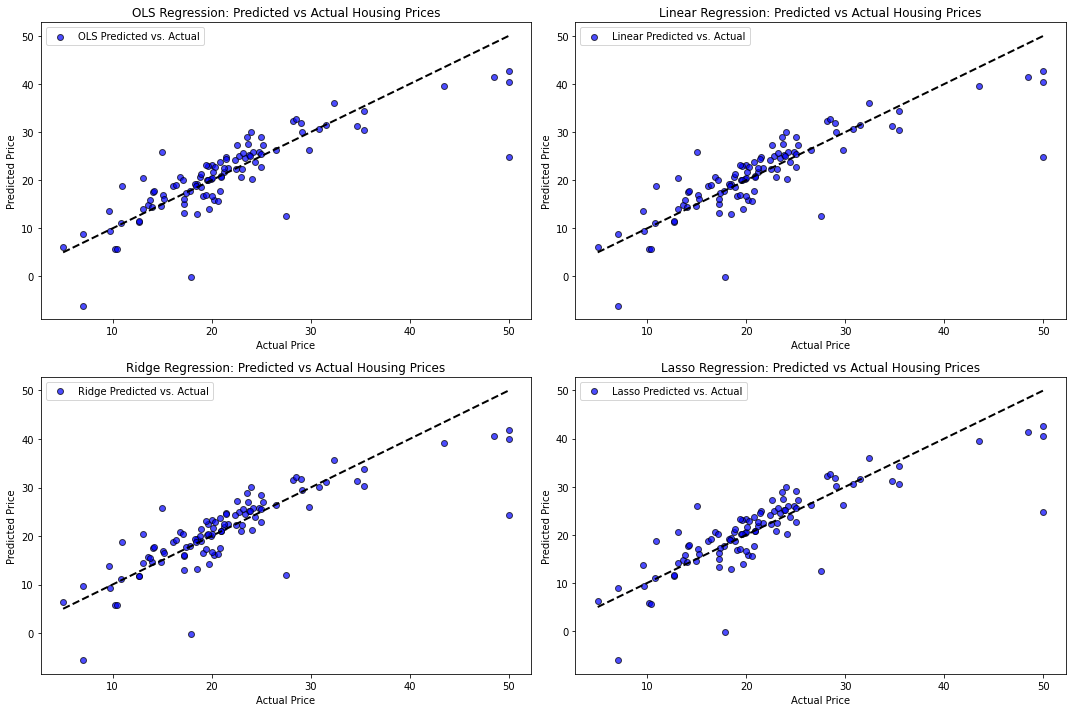

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

# Load Boston housing dataset
X, y = load_boston(return_X_y=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling for sklearn models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add a constant to the feature set for OLS regression
X_ols_train = sm.add_constant(X_train)
X_ols_test = sm.add_constant(X_test)


# Initialize and train models
ols_model = sm.OLS(y_train, X_ols_train).fit()
linear_model = LinearRegression().fit(X_train_scaled, y_train)
ridge_cv = RidgeCV(alphas=[0.1, 1.0, 10.0, 100.0]).fit(X_train_scaled, y_train)
lasso_cv = LassoCV(alphas=[0.001, 0.01, 0.1, 1.0, 10.0]).fit(X_train_scaled, y_train)

# Predict with the models
y_pred_ols = ols_model.predict(X_ols_test)
y_pred_linear = linear_model.predict(X_test_scaled)
y_pred_ridge = ridge_cv.predict(X_test_scaled)
y_pred_lasso = lasso_cv.predict(X_test_scaled)

# Calculate and print R^2 score and MSE for each model
models = ['OLS', 'Linear', 'Ridge', 'Lasso']
predictions = [y_pred_ols, y_pred_linear, y_pred_ridge, y_pred_lasso]
for name, y_pred in zip(models, predictions):
    print(f"{name} Regression R^2 score: {r2_score(y_test, y_pred):.4f}")
    print(f"{name} Regression MSE: {mean_squared_error(y_test, y_pred):.4f}\n")

# Plotting Actual vs Predicted prices for all models
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.flatten()

for i, (name, y_pred) in enumerate(zip(models, predictions)):
    axs[i].scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7, label=f'{name} Predicted vs. Actual')
    axs[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    axs[i].set_xlabel('Actual Price')
    axs[i].set_ylabel('Predicted Price')
    axs[i].set_title(f'{name} Regression: Predicted vs Actual Housing Prices')
    axs[i].legend()

plt.tight_layout()
plt.show()


OLS Regression R^2 score: 0.6688
OLS Regression MSE: 24.2911
Linear Regression R^2 score: 0.6688
Linear Regression MSE: 24.2911
Ridge Regression R^2 score: 0.6660
Ridge Regression MSE: 24.4958
Lasso Regression R^2 score: 0.6687
Lasso Regression MSE: 24.2945

OLS Regression Coefficients:
 [ 3.02467510e+01 -1.13055924e-01  3.01104641e-02  4.03807204e-02
  2.78443820e+00 -1.72026334e+01  4.43883520e+00 -6.29636221e-03
 -1.44786537e+00  2.62429736e-01 -1.06467863e-02 -9.15456240e-01
  1.23513347e-02 -5.08571424e-01]

Linear Regression Coefficients:
 [-1.00213533  0.69626862  0.27806485  0.7187384  -2.0223194   3.14523956
 -0.17604788 -3.0819076   2.25140666 -1.76701378 -2.03775151  1.12956831
 -3.61165842]

Ridge Regression Coefficients:
 [-0.92129427  0.55113158  0.0817479   0.74685872 -1.74937519  3.18716624
 -0.18328278 -2.75585734  1.65751243 -1.24757615 -1.95094026  1.10650844
 -3.4960827 ]

Lasso Regression Coefficients:
 [-0.99935912  0.69130002  0.26893579  0.71887992 -2.01602945  

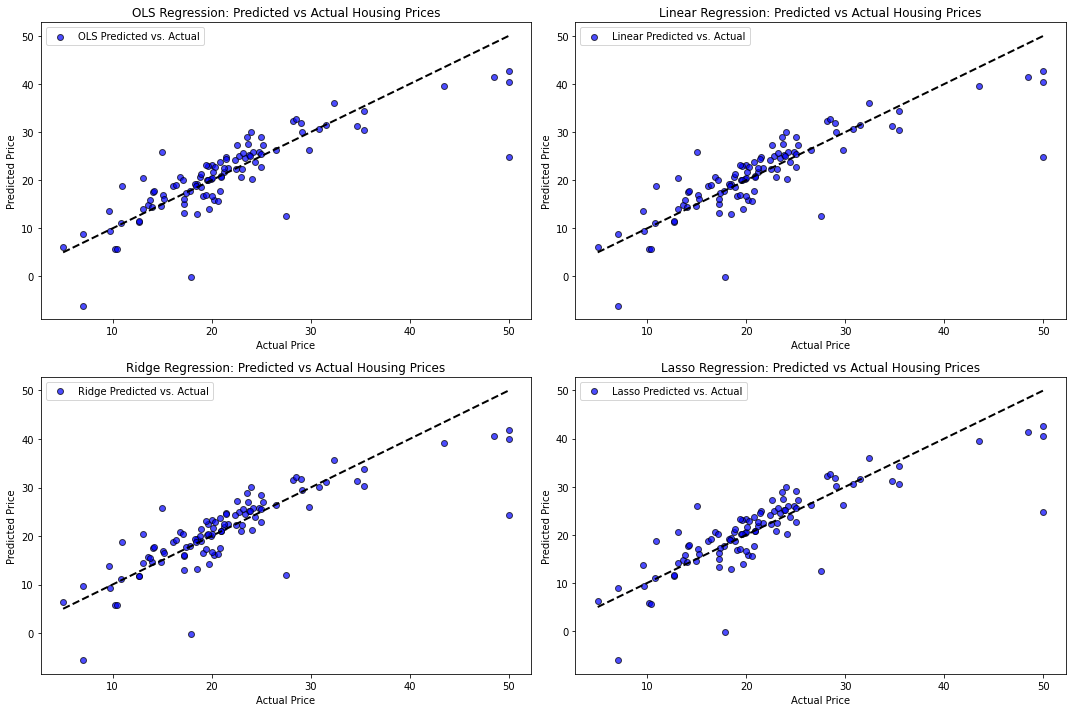

In [8]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

# Load Boston housing dataset
X, y = load_boston(return_X_y=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling for sklearn models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add a constant to the feature set for OLS regression
X_ols_train = sm.add_constant(X_train)
X_ols_test = sm.add_constant(X_test)


# Initialize and train models
ols_model = sm.OLS(y_train, X_ols_train).fit()
linear_model = LinearRegression().fit(X_train_scaled, y_train)
ridge_cv = RidgeCV(alphas=[0.1, 1.0, 10.0, 100.0]).fit(X_train_scaled, y_train)
lasso_cv = LassoCV(alphas=[0.001, 0.01, 0.1, 1.0, 10.0]).fit(X_train_scaled, y_train)

# Predict with the models
y_pred_ols = ols_model.predict(X_ols_test)
y_pred_linear = linear_model.predict(X_test_scaled)
y_pred_ridge = ridge_cv.predict(X_test_scaled)
y_pred_lasso = lasso_cv.predict(X_test_scaled)

# Calculate and display R^2 score and MSE for each model
models = ['OLS', 'Linear', 'Ridge', 'Lasso']
predictions = [y_pred_ols, y_pred_linear, y_pred_ridge, y_pred_lasso]

for name, y_pred in zip(models, predictions):
    print(f"{name} Regression R^2 score: {r2_score(y_test, y_pred):.4f}")
    print(f"{name} Regression MSE: {mean_squared_error(y_test, y_pred):.4f}")

# Print coefficients for each model
print("\nOLS Regression Coefficients:\n", ols_model.params)
print("\nLinear Regression Coefficients:\n", linear_model.coef_)
print("\nRidge Regression Coefficients:\n", ridge_cv.coef_)
print("\nLasso Regression Coefficients:\n", lasso_cv.coef_)

# Plotting Actual vs Predicted prices for all models
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.flatten()

for i, (name, y_pred) in enumerate(zip(models, predictions)):
    axs[i].scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7, label=f'{name} Predicted vs. Actual')
    axs[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    axs[i].set_xlabel('Actual Price')
    axs[i].set_ylabel('Predicted Price')
    axs[i].set_title(f'{name} Regression: Predicted vs Actual Housing Prices')
    axs[i].legend()

plt.tight_layout()
plt.show()


In [9]:
# Import necessary libraries Simple linear Regression with one variable
import numpy as np
import statsmodels.api as sm
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Load Boston housing dataset
X, y = load_boston(return_X_y=True)

# Use only the RM feature (average number of rooms per dwelling)
X_rm = X[:, np.newaxis, 5]  # Reshape for a single feature

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_rm, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# For OLS, add a constant to the feature set
X_train_scaled_ols = sm.add_constant(X_train_scaled)
X_test_scaled_ols = sm.add_constant(X_test_scaled)



# Initialize and train OLS model from statsmodels
ols_model = sm.OLS(y_train, X_train_scaled_ols).fit()

# Initialize and train Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# Initialize and train Ridge Regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)

# Initialize and train Lasso Regression model
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_scaled, y_train)

# Predict with the models
y_pred_ols = ols_model.predict(X_test_scaled_ols)
y_pred_linear = linear_model.predict(X_test_scaled)
y_pred_ridge = ridge_model.predict(X_test_scaled)
y_pred_lasso = lasso_model.predict(X_test_scaled)

# Calculate MSE and R^2 score for each model
mse_ols = mean_squared_error(y_test, y_pred_ols)
r2_ols = ols_model.rsquared  # Note: This is for the model fit on training data

mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = linear_model.score(X_test_scaled, y_test)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = ridge_model.score(X_test_scaled, y_test)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = lasso_model.score(X_test_scaled, y_test)

# Print MSE and R^2 score for each model
print(f'OLS Regression MSE: {mse_ols}')
print(f'OLS Regression R^2 Score: {r2_ols}\n')  # Adjusted to reflect actual test performance

print(f'Linear Regression MSE: {mse_linear}')
print(f'Linear Regression R^2 Score: {r2_linear}\n')

print(f'Ridge Regression MSE: {mse_ridge}')
print(f'Ridge Regression R^2 Score: {r2_ridge}\n')

print(f'Lasso Regression MSE: {mse_lasso}')
print(f'Lasso Regression R^2 Score: {r2_lasso}')


OLS Regression MSE: 46.14477534731728
OLS Regression R^2 Score: 0.5050658352776293

Linear Regression MSE: 46.144775347317264
Linear Regression R^2 Score: 0.3707569232254778

Ridge Regression MSE: 46.11703820779506
Ridge Regression R^2 Score: 0.371135154626162

Lasso Regression MSE: 45.98285564675279
Lasso Regression R^2 Score: 0.3729649055984925
